<a href="https://colab.research.google.com/github/fkofkf431/Netflix-Movies-and-TV-Shows-Clustering-capstone-project/blob/main/Netflix_Movies_and_TV_Shows(Clustering)_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title-Netflix Movies and TV Shows Clustering**

***Name-***Mohd Firoz Chaudhri

***Contribution-***Individual

# **Problem Description-**

In this project, the goal is to analyze and cluster a dataset of Netflix movies and TV shows. The dataset contains various attributes such as title, description, release year, duration, genres, and more. The objective is to group similar content items together into clusters based on their attributes. This clustering can provide insights into the underlying patterns and relationships between different types of content available on the platform.

# **Data Description**

The dataset comprises a collection of Netflix movies and TV shows, each represented by various attributes.

**Attributes**

Show_ID: A unique identifier for each content entry.

Type: Denotes whether the entry is a movie or TV show.

Title: The title of the content.

Director: The director's name (if applicable).

Cast: List of actors or characters (if applicable).

Country: The country of origin.

Date_Added: The date the content was added to Netflix.

Release_Year: The year the content was released.

Rating: The content's rating.

Duration: The duration in terms of seasons or minutes.

Listed_In: The genre(s) the content is categorized under.

Description: A brief synopsis of the content's plot.

# **Objective**

The objective of this dataset is to explore and analyze the content attributes to uncover patterns, trends, and potential clusters within the Netflix movies and TV shows. By utilizing clustering techniques, we aim to group similar content items together based on shared attributes. This analysis can provide valuable insights for content recommendation, trend analysis, and understanding user preferences on the platform.

# **Github Link**

In [2]:
#Importing libraries that are required
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading dataset
df=pd.read_csv('/content/drive/MyDrive/Netflix dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [5]:
#check first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#check last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
#check random 10 rows
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5705,s5706,TV Show,Someone Has to Die,Manolo Caro,"Carmen Maura, Cecilia Suárez, Ester Expósito, ...","Mexico, Spain","October 16, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...","In conservative 1950s Spain, the alleged relat..."
7000,s7001,Movie,The Willoughbys,Kris Pearn,"Will Forte, Maya Rudolph, Ricky Gervais, Aless...","Canada, United States, United Kingdom","April 22, 2020",2020,PG,92 min,"Children & Family Movies, Comedies",Four siblings with horribly selfish parents ha...
4010,s4011,TV Show,Medal of Honor,NaN,"Oliver Hudson, Ben Schwartz, Paul Wesley, Aldi...",United States,"November 9, 2018",2018,TV-MA,1 Season,"Docuseries, TV Dramas",Honoring service members whose courage merited...
5629,s5630,TV Show,Single Ladies Senior,NaN,"Summer Meng, Christina Mok, Alina Cheng, Bonni...",NaN,"December 22, 2018",2018,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Four best friends and spirited career women na...
4698,s4699,Movie,Our Shining Days,NaN,"Lulu Xu, Yuchang Peng, Mingjie Luo, Yongxi Liu...",China,"July 1, 2018",2017,TV-PG,103 min,"Comedies, Dramas, International Movies","In a battle of the bands, a percussions studen..."
3744,s3745,TV Show,Love Alarm,NaN,"Kim So-hyun, Jung Ga-ram, Song Kang, Ko Min-si...",South Korea,"August 22, 2019",2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...",In a world where an app alerts people if someo...
6368,s6369,Movie,The Forest of Love,Sion Sono,"Kippei Shiina, Shinnosuke Mitsushima, Kyooko H...",Japan,"October 11, 2019",2019,TV-MA,151 min,"Dramas, International Movies, Thrillers",A con man and a would-be filmmaking crew force...
4441,s4442,Movie,Nee Enge En Anbe,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",NaN,"September 17, 2020",2014,TV-14,137 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...
969,s970,Movie,Blackway,Daniel Alfredson,"Anthony Hopkins, Julia Stiles, Alexander Ludwi...",United States,"December 15, 2017",2015,PG-13,90 min,Thrillers,Menaced by a psychopath who's got the local co...
5661,s5662,Movie,Sleeping with Other People,Leslye Headland,"Jason Sudeikis, Alison Brie, Adam Scott, Jason...",United States,"October 2, 2017",2015,R,101 min,"Comedies, Dramas, Independent Movies","Many years after hooking up in college, two pe..."


In [10]:
#lets check shape of the dataset
df.shape

(7787, 12)

So we have 7787 rows and 12 columns in our dataset.

In [11]:
#check information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [12]:
#check columns in our dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Data Preprocessing**

Data preprocessing is the initial step in the data analysis process where raw data is prepared and transformed into a clean, organized, and usable format.  Data preprocessing involves cleaning, organizing, and getting the data ready for analysis or modeling. It helps ensure that the data is accurate, relevant, and in a form that can provide meaningful insights or predictions.

In [15]:
#check duplicate values
df.duplicated().sum()

0

So we found no duplicate value in our dataset

In [17]:
#Check null values in our dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

So in our dataset we found that director column has 2389 null values,cast column has 718 null values, country column has 507 null values,date_added column has 10 null values and rating has null values.

**Handling null values**

In our dataset director column has more null values,so we will drop this column.And date added and ratings is not necessary column for us,so we will also drop these columns.Cast and country is important column to us,so we will fill missing values in these columns.

In [18]:
#Drop director,date_added and rating columns from our dataset
df.drop(['director','date_added','rating'],axis=1,inplace=True)

In [19]:
df.head()

,show_id,type,title,cast,country,release_year,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,123 min,Dramas,A brilliant group of students become card-coun...


In [20]:
#fill missing values in cast and country columns
df['cast'].fillna(value='no cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [21]:
#Again check null values
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
release_year    0
duration        0
listed_in       0
description     0
dtype: int64

Now we found that we have no null values in our dataset.

# **EDA(Exploratory Data Analysis)**

EDA is about exploring and getting to know your data. You look at your data, create visualizations, calculate simple statistics, and try to understand the patterns, trends, and interesting things about it. EDA helps you become familiar with your data's story before you dive into more detailed analysis or modeling.

***Count of movies and tv shows***

In [22]:
#count of movies and tv shows
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

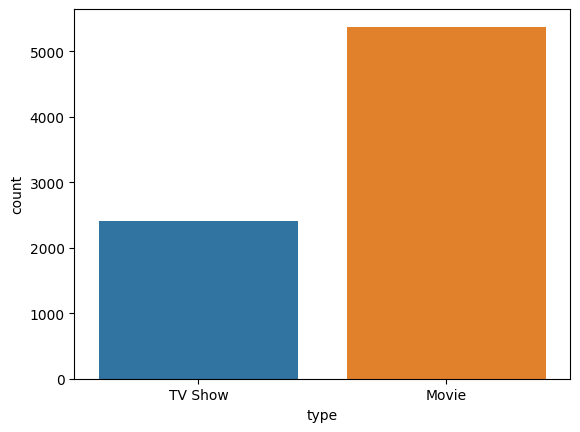

In [25]:
#Visualize using barplot
sns.countplot(data=df,x='type')
plt.show()


From above countplot we found that more than 2000 is tv shows and more than 5000 is movie.